In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from fitter import Fitter

In [3]:
# load the transaction data
df1 = pd.read_csv("POS_Data/POS_transactions_20171207-20171219.csv")
df2 = pd.read_csv("POS_Data/POS_transactions_20190213-20190226.csv")
df3 = pd.read_csv("POS_Data/POS_transactions_20190328-20190410.csv")

data = pd.concat((df1,df2,df3))

In [4]:
data.head()

,WorkstationGroupID,TranID,BeginDateTime,EndDateTime,OperatorID,TranTime,BreakTime,ArtNum,TNcash,TNcard,Amount
0,1,1.712071e+14,2017-12-07T14:23:23,2017-12-07T14:24:36,101,73,33,23,True,False,112.71
1,1,1.712071e+14,2017-12-07T14:25:09,2017-12-07T14:27:00,101,111,28,29,True,False,54.76
2,1,1.712071e+14,2017-12-07T14:27:28,2017-12-07T14:27:48,101,20,16,3,True,False,14.77
3,1,1.712071e+14,2017-12-07T14:28:04,2017-12-07T14:28:29,101,25,71,12,True,False,37.88
4,1,1.712071e+14,2017-12-07T14:29:40,2017-12-07T14:30:32,101,52,31,7,True,False,115.34


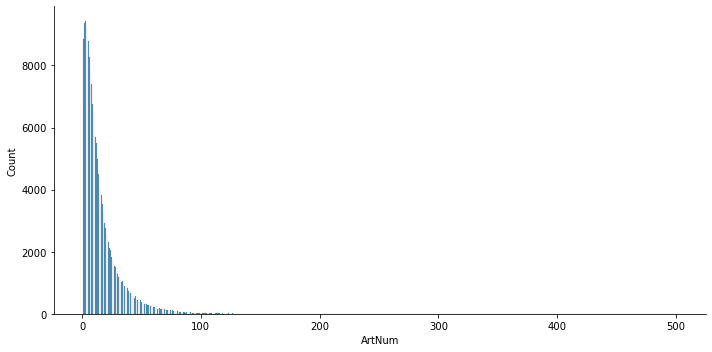

In [5]:
sns.displot(data['ArtNum'], kind='hist',aspect=2)

In [6]:
# create numpy array for fitter
num_items = data['ArtNum'].values

/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
exponnorm,0.000027,4003.318894,-3.677544e+06,inf
expon,0.000027,3973.836845,-3.676606e+06,inf
burr,0.000048,2397.519540,-3.583084e+06,inf
invgamma,0.000053,2049.396963,-3.565654e+06,inf
wald,0.000077,2804.691152,-3.506326e+06,inf


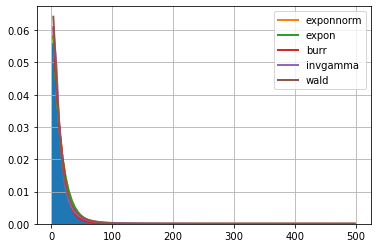

In [7]:
f = Fitter(num_items)

f.fit()

f.summary()

In [8]:
f.get_best(method='sumsquare_error')

{'exponnorm': {'K': 2370.571416859694,
  'loc': 0.9820283135910775,
  'scale': 0.006077563348787769}}

,sumsquare_error,aic,bic,kl_div
expon,0.000027,3973.836845,-3.676606e+06,inf
wald,0.000077,2804.691152,-3.506326e+06,inf
exponnorm,inf,inf,inf,inf
invgamma,inf,inf,inf,inf
burr,inf,inf,inf,inf


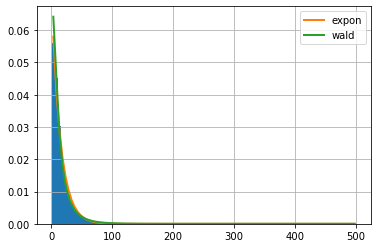

In [13]:
g = Fitter(num_items,
           distributions=[
               'exponnorm',
               'expon',
               'burr',
               'invgamma',
               'wald'
           ])
g.fit()
g.summary()

In [14]:
g.get_best(method='sumsquare_error')

{'expon': {'loc': 1.0, 'scale': 14.528563291255535}}

In [18]:
rate = 1/14.528563291255535
print(rate)

0.06882993038973653
